# Instacart Grocery Basket Data Analysis: Final Report Bonus
Script by Adilya Zaripova

## Overview of User Data Concerns:

1. Monthly User Registrations: Understanding the count of users who joined during each month across various years.
2. Age Insights by Joining Month: Exploring the ages of users who joined in different months.  
3. Age-Dependants Correlation: Investigating the relationship between users' age and the number of dependants.   

I strongly recommend the data owner to review the mentioned aspects to ensure accurate data recording.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from scipy.stats import pearsonr

In [2]:
%matplotlib inline
rcParams['figure.figsize']=14,7
sns.set_style('whitegrid')

In [3]:
# Importing the original data

path=r'C:\Users\frauz\Documents\Python Projects\08-2023 Instacart Basket Analysis\02.Data'
cust=pd.read_csv(os.path.join(path,'Original Data','customers.csv'), encoding='cp1252', parse_dates=True)
cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


##### 1. The count of users who joined the application in each month across all years within the documented timeframe is remarkably consistent.

In [4]:
# Extracting year-month from the date joined

cust['date_joined']=pd.to_datetime(cust['date_joined'])
cust['month_year']=cust['date_joined'].dt.to_period('M')

Text(0.5, 1.0, 'Number of users joined across each month/year')

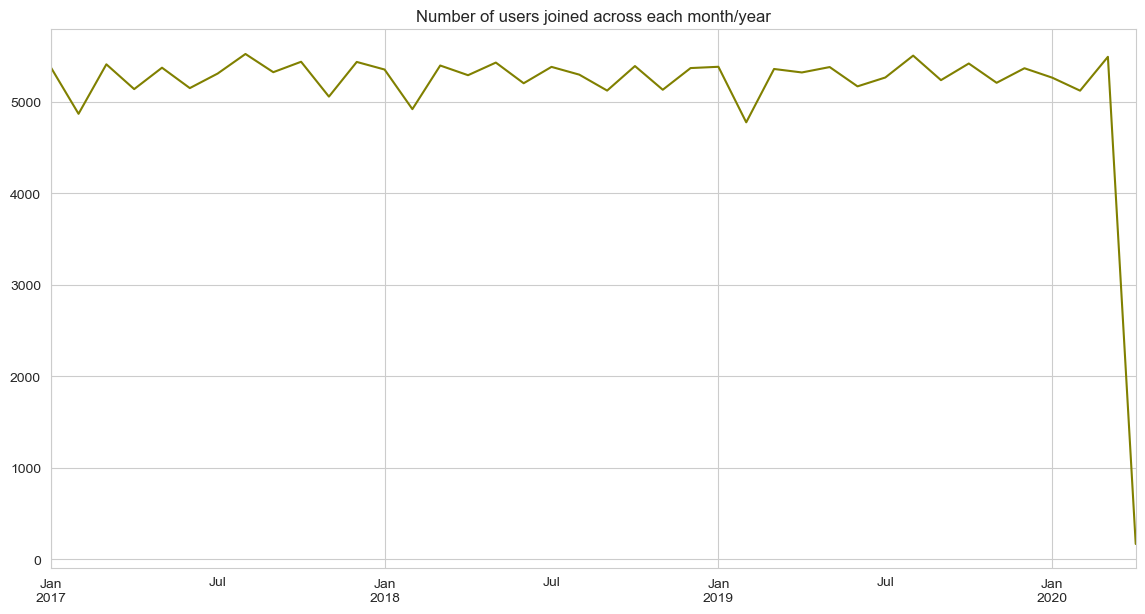

In [13]:
# Plotting the number of users joined in every year-month

cust.groupby('month_year')['user_id'].count().plot(c='olive')
plt.xlabel('')
plt.title('Number of users joined across each month/year')

##### 2. Upon closer examination of users who joined the application during various months, it becomes evident that there are remarkably similar age distribution patterns among different groups.

Text(0.5, 1.0, 'Age of users joined in various months')

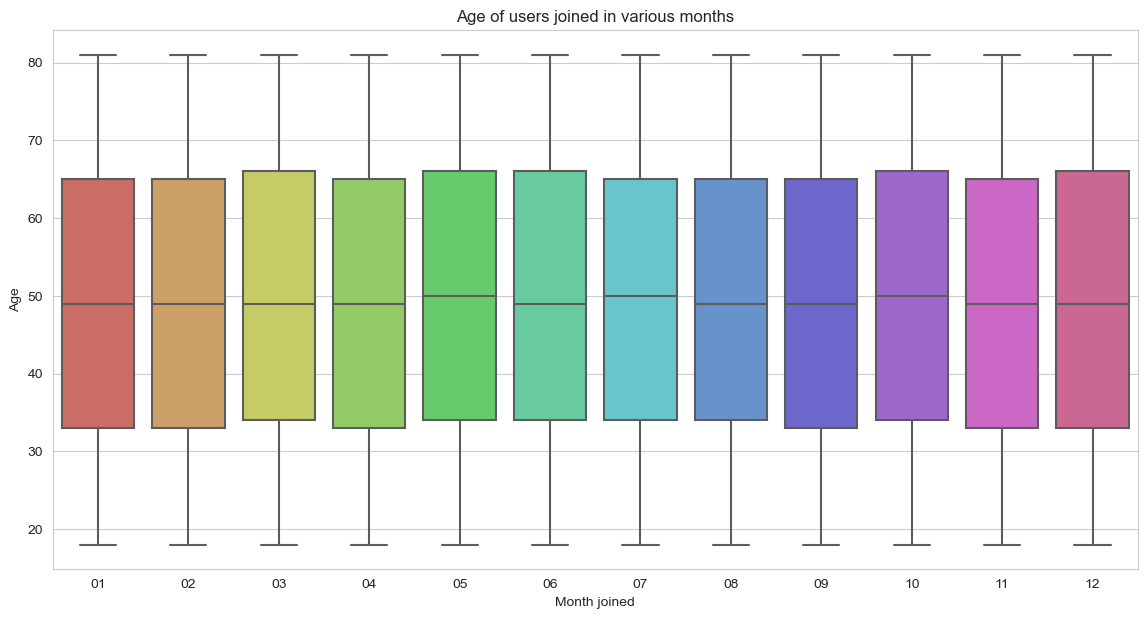

In [15]:
cust['month_joined']=cust['date_joined'].dt.strftime('%m')
sns.boxplot(x='month_joined', y='Age', data=cust, palette='hls')
plt.xlabel('Month joined')
plt.title('Age of users joined in various months')

#### 3. It's logical to expect a positive correlation between age and the number of dependants. But the actual findings reveal no such correlation. 

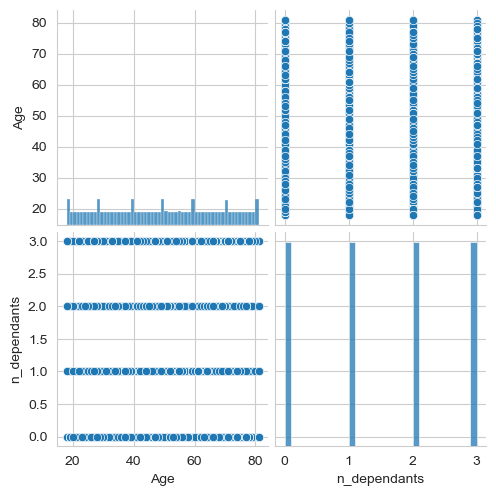

In [7]:
sns.pairplot(cust[['Age','n_dependants']])

In [8]:
# Calculating correlation coefficient

cor=cust[['Age','n_dependants']].corr()
cor

,Age,n_dependants
Age,1.00000,0.00104
n_dependants,0.00104,1.00000


In [9]:
# Isolating the users with the highest number of dependants to see the distribution across different ages

x=cust['n_dependants'].max()
df_max_dep=cust[cust['n_dependants']==x]

Text(0.5, 1.0, 'Number of users with 3 dependents across all ages')

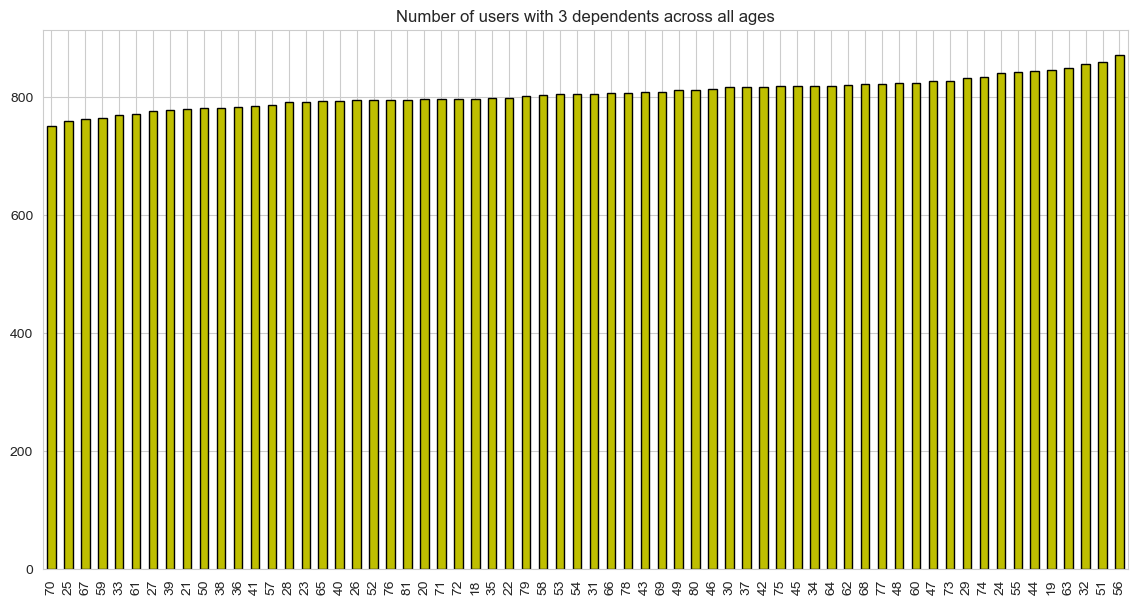

In [16]:
df_max_dep['Age'].value_counts().sort_values().plot.bar(color='y', edgecolor='k')
plt.title('Number of users with 3 dependents across all ages')

#### Within the Instacart user base, an unusual scenario arises where an almost identical number of individuals have three children at both 20 and 81 years of age. This occurrence appears highly atypical.

Text(0.5, 0, 'Age')

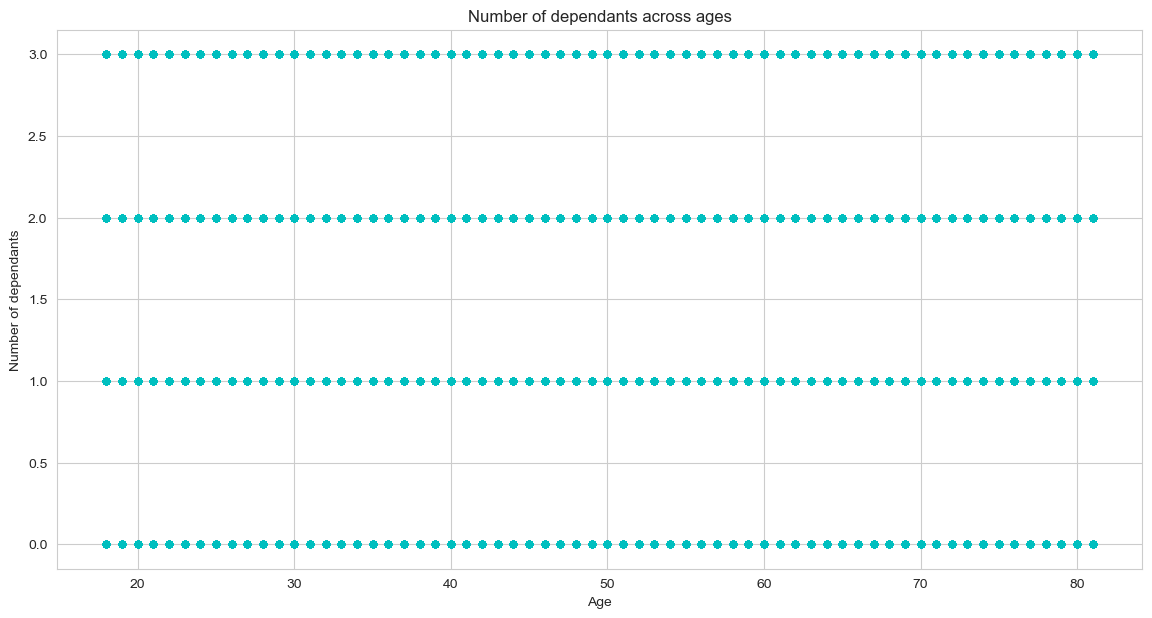

In [19]:
cust.plot(kind='scatter', x='Age', y='n_dependants', color='c')
plt.title('Number of dependants across ages')
plt.ylabel('Number of dependants')
plt.xlabel('Age')